In [6]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt

In [8]:
#Generate synthetic data
X, Y = make_blobs(n_samples=200, centers=3, n_features=2, random_state=42)

In [9]:
# Split into training and validation sets
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

In [10]:
# Normalize  data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [11]:
# Build the model
model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=regularizers.l2(0.01)),
    layers.Dropout(0.4),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Dropout(0.4),
    layers.Dense(3, activation='softmax')  # 3 classes
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [13]:
# Early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)


In [14]:
# Train the model
history = model.fit(X_train, Y_train,
                    epochs=45,
                    batch_size=32,
                    validation_data=(X_val, Y_val),
                    callbacks=[early_stopping])


Epoch 1/45
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.3327 - loss: 2.0089 - val_accuracy: 0.6000 - val_loss: 1.9796
Epoch 2/45
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3547 - loss: 2.0052 - val_accuracy: 0.6500 - val_loss: 1.9575
Epoch 3/45
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3185 - loss: 1.9961 - val_accuracy: 0.6750 - val_loss: 1.9359
Epoch 4/45
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3888 - loss: 1.9484 - val_accuracy: 0.6750 - val_loss: 1.9145
Epoch 5/45
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4500 - loss: 1.9408 - val_accuracy: 0.6750 - val_loss: 1.8937
Epoch 6/45
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4849 - loss: 1.9244 - val_accuracy: 0.7000 - val_loss: 1.8738
Epoch 7/45
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4655 - loss: 1.9063 - val_accuracy: 0.9500 - val_loss: 1.8541
Epoch 8/45
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5083 - loss: 1.9068 - val_accuracy: 1.0000 - val_loss: 1.8347


In [15]:
# Plot the results
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

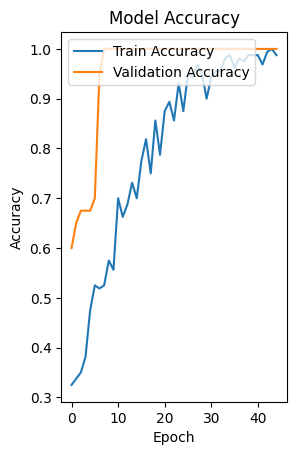

In [16]:
# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')


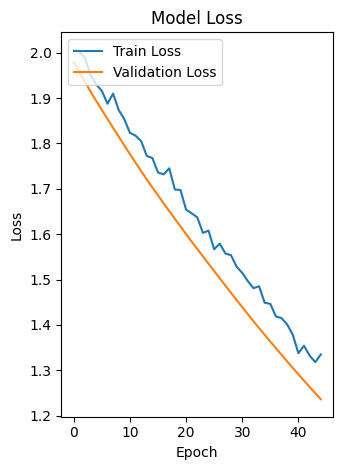

In [17]:
# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


In [19]:

# Predict the classes
predictions = model.predict(X_val)
predicted_classes = np.argmax(predictions, axis=1)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


In [20]:
# Accuracy calculation
accuracy = np.mean(predicted_classes == Y_val)
print(f"Accuracy on the validation set: {accuracy * 100:.2f}%")


Accuracy on the validation set: 100.00%


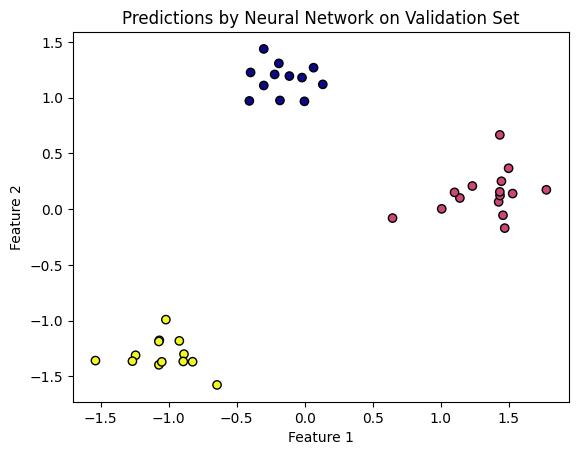

In [21]:
# Visualize the predictions
plt.scatter(X_val[:, 0], X_val[:, 1], c=predicted_classes, cmap="plasma", edgecolor="k", marker='o')
plt.title("Predictions by Neural Network on Validation Set")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()